In [27]:
import cv2
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.metrics import structural_similarity as ssim

In [4]:
train_path = '../fashionmnist/fashion-mnist_train.csv'
private_path = './private_test_data.csv'
train = pd.read_csv(train_path)
grouped_train = train.groupby('label')
private = pd.read_csv(private_path)
train = train.drop(['label'],axis = 1)
private = private.drop(['label'],axis = 1)
print(train.shape)
print(private.shape)

(60000, 784)
(15000, 784)


In [41]:
train=np.array(train)
train=train.reshape(60000,28,28)
train=list(train)
private=np.array(private)
private=private.reshape(15000,28,28)
private=list(private)

In [10]:
def cal_sim(img1, img2):
    return ssim(img1, img2, data_range=8)

In [51]:
#res_result = []
cross_train = set()
for pri_ind in range(2):
    max_sim_ind = []
    img1 = private[pri_ind]
    max_sim, max_sim_ind = -1, -1
    for train_ind in range(60000):
        sim = ssim(img1, train[train_ind], data_range=8)
        if (max_sim < sim):
            max_sim = sim; max_sim_ind = train_ind
    print(f"now private index... {pri_ind}")
    #res_result.append([img1, train[max_sim_ind[0][1]]])
    cross_train.add(max_sim_ind)

now private index... 0
now private index... 1


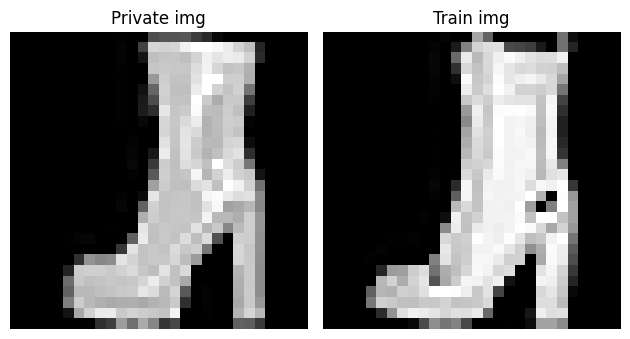

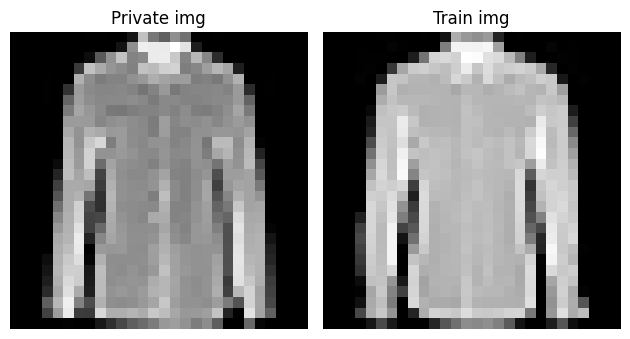

In [34]:
'''
for i in range(len(res_result)):
    image1, image2 = res_result[i]
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # 첫 번째 이미지 표시
    ax0 = plt.subplot(gs[0])
    ax0.imshow(image1, cmap='gray')
    ax0.set_title('Private img')
    ax0.axis('off')
    ax1 = plt.subplot(gs[1])
    ax1.imshow(image2, cmap='gray')
    ax1.set_title('Train img')
    ax1.axis('off')
    # 이미지 간의 간격 조정
    plt.tight_layout()

    # 플롯 보여주기
    plt.show()
'''

In [50]:
print(cross_train, len(cross_train))

{2480, 15129} 2
